# Importing Toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing & Inspecting Dataset

In [2]:
df = pd.read_csv("railway.csv")
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [3]:
df.shape

(31653, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [5]:
df.describe().round(2)

,Price
count,31653.00
mean,23.44
std,30.00
min,1.00
25%,5.00
50%,11.00
75%,35.00
max,267.00


# Uni-variant Analysis Using ydata_profiling.

In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:03<00:00,  5.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing.

- Handle Missing Values

In [7]:
df.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [8]:
print(f"The Percentage of 'na' in Railcard column is : {(df["Railcard"].isna().mean()*100).round(2)}")

The Percentage of 'na' in Railcard column is : 66.09


In [9]:
df['Railcard'] = df['Railcard'].fillna("None")

In [10]:
df.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [11]:
df['Reason for Delay'] =df['Reason for Delay'].fillna("No Delay") 

In [12]:
df.isna().sum()

Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
dtype: int64

In [13]:
# if the Actual Arival Time is NaN then the journy status is "Cancelled" (this mean no arival)

df["Actual Arrival Time"] = df["Actual Arrival Time"].fillna("No Arival")

In [14]:
df.isna().sum()


Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

- Handle Data Duplication

In [15]:
df.duplicated().sum()

0

- Data Manipulation

In [16]:
# Drop Transaction ID Column
df.drop("Transaction ID" , axis= 1, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date of Purchase     31653 non-null  object
 1   Time of Purchase     31653 non-null  object
 2   Purchase Type        31653 non-null  object
 3   Payment Method       31653 non-null  object
 4   Railcard             31653 non-null  object
 5   Ticket Class         31653 non-null  object
 6   Ticket Type          31653 non-null  object
 7   Price                31653 non-null  int64 
 8   Departure Station    31653 non-null  object
 9   Arrival Destination  31653 non-null  object
 10  Date of Journey      31653 non-null  object
 11  Departure Time       31653 non-null  object
 12  Arrival Time         31653 non-null  object
 13  Actual Arrival Time  31653 non-null  object
 14  Journey Status       31653 non-null  object
 15  Reason for Delay     31653 non-null  object
 16  Refu

In [18]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"]) 
df["Time of Purchase"] = pd.to_datetime(df["Time of Purchase"]) 
df["Date of Journey"] = pd.to_datetime(df["Date of Journey"]) 
df["Arrival Time"] = pd.to_datetime(df["Arrival Time"]) 


C:\Users\abdal\AppData\Local\Temp\ipykernel_9560\2494512676.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time of Purchase"] = pd.to_datetime(df["Time of Purchase"])
C:\Users\abdal\AppData\Local\Temp\ipykernel_9560\2494512676.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival Time"] = pd.to_datetime(df["Arrival Time"])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date of Purchase     31653 non-null  datetime64[ns]
 1   Time of Purchase     31653 non-null  datetime64[ns]
 2   Purchase Type        31653 non-null  object        
 3   Payment Method       31653 non-null  object        
 4   Railcard             31653 non-null  object        
 5   Ticket Class         31653 non-null  object        
 6   Ticket Type          31653 non-null  object        
 7   Price                31653 non-null  int64         
 8   Departure Station    31653 non-null  object        
 9   Arrival Destination  31653 non-null  object        
 10  Date of Journey      31653 non-null  datetime64[ns]
 11  Departure Time       31653 non-null  object        
 12  Arrival Time         31653 non-null  datetime64[ns]
 13  Actual Arrival Time  31653 non-

In [20]:
df.sample(2)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
4583,2024-01-18,2025-08-20 09:32:28,Station,Contactless,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-01-18,11:00:00,2025-08-20 11:30:00,14:10:00,Delayed,Staff Shortage,No
29283,2024-04-21,2025-08-20 17:16:49,Station,Credit Card,None,First Class,Advance,36,York,Edinburgh,2024-04-22,15:45:00,2025-08-20 18:15:00,18:15:00,On Time,No Delay,No


In [21]:
df["Journey Day"] = df["Date of Journey"].dt.day_name()
df["Journey Month"] = df["Date of Journey"].dt.month

In [22]:
df.sample(2)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Journey Day,Journey Month
12757,2024-02-11,2025-08-20 17:26:59,Online,Contactless,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-11,18:45:00,2025-08-20 19:15:00,19:15:00,On Time,No Delay,No,Sunday,2
9424,2024-02-03,2025-08-20 08:22:35,Online,Credit Card,None,Standard,Advance,18,London Paddington,Oxford,2024-02-04,07:45:00,2025-08-20 09:15:00,09:15:00,On Time,No Delay,No,Sunday,2


In [23]:
# Add Route column to get the common Routes
df["Route"] = df["Departure Station"] + " → " + df["Arrival Destination"]

In [24]:
df.sample(2)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Journey Day,Journey Month,Route
29335,2024-04-21,2025-08-20 20:29:09,Online,Credit Card,None,Standard,Advance,8,London St Pancras,Birmingham New Street,2024-04-22,18:45:00,2025-08-20 20:05:00,No Arival,Cancelled,Traffic,Yes,Monday,4,London St Pancras → Birmingham New Street
20392,2024-03-18,2025-08-20 15:49:31,Online,Credit Card,None,Standard,Anytime,70,London Kings Cross,York,2024-03-18,17:15:00,2025-08-20 19:05:00,19:05:00,On Time,No Delay,No,Monday,3,London Kings Cross → York


- Outliers

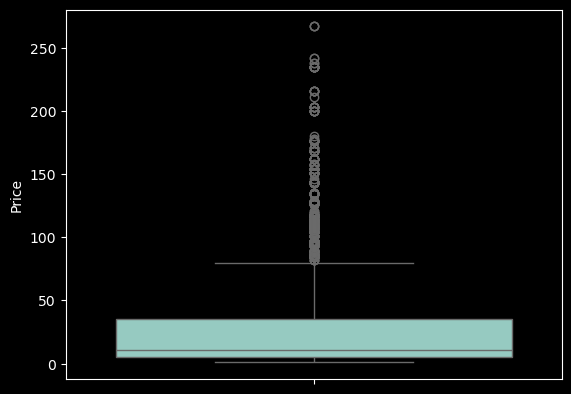

In [25]:
sns.boxplot(df["Price"])
plt.show()

In [ ]:
# If any value is less than  ( Q1 - 1.5 * IQR )  or greater than ( Q3 + 1.5 * IQR ) then it's an Outlier.
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Price"] >= (Q1 - 1.5 * IQR)) & (df["Price"] <= (Q3 + 1.5 * IQR))]


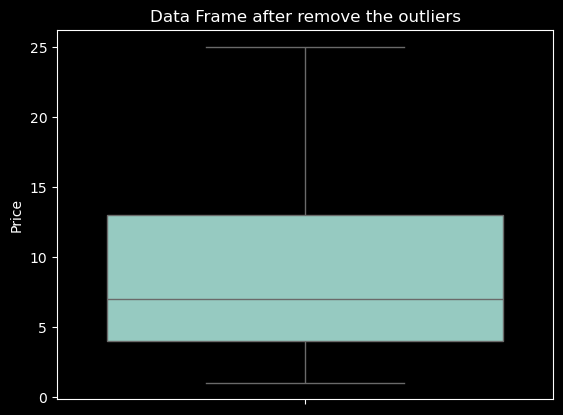

In [45]:
sns.boxplot(df["Price"])
plt.title("Data Frame after remove the outliers")
plt.show()

# Save the cleaned version of Dataset.

In [80]:
df.to_csv("railway cleaned version.csv", index= False)

# Expolatory Data Analysis (EDA).

In [47]:
df.head()

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Journey Day,Journey Month,Route
1,2023-12-16,2025-08-20 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,2025-08-20 11:35:00,11:40:00,Delayed,Signal Failure,No,Monday,1,London Kings Cross → York
2,2023-12-19,2025-08-20 19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,2025-08-20 18:45:00,18:45:00,On Time,No Delay,No,Tuesday,1,Liverpool Lime Street → Manchester Piccadilly
3,2023-12-20,2025-08-20 23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,2025-08-20 22:30:00,22:30:00,On Time,No Delay,No,Monday,1,London Paddington → Reading
6,2023-12-31,2025-08-20 00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,2025-08-20 23:40:00,23:40:00,On Time,No Delay,No,Monday,1,London Euston → Oxford
7,2023-12-31,2025-08-20 01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,2025-08-20 00:30:00,00:30:00,On Time,No Delay,No,Monday,1,Liverpool Lime Street → Manchester Piccadilly


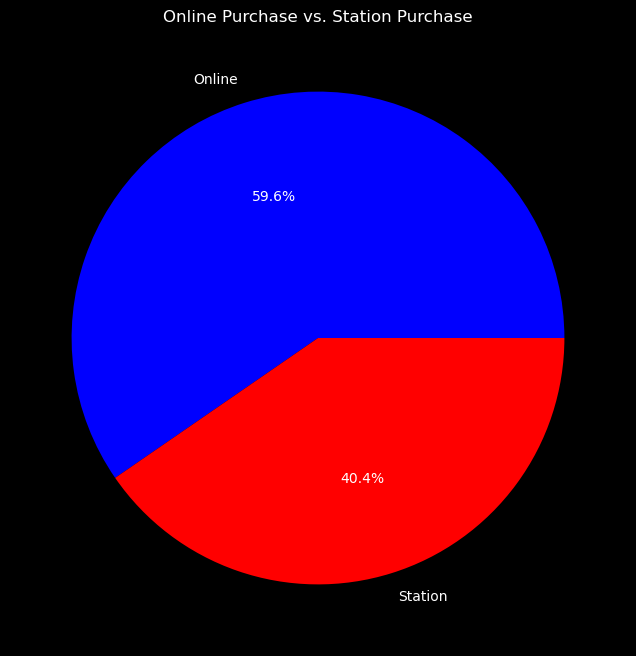

In [30]:
plt.figure(figsize= (12,8))
category_counts = df["Purchase Type"].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%",colors={'red' ,'blue'})
plt.title("Online Purchase vs. Station Purchase")
plt.show()


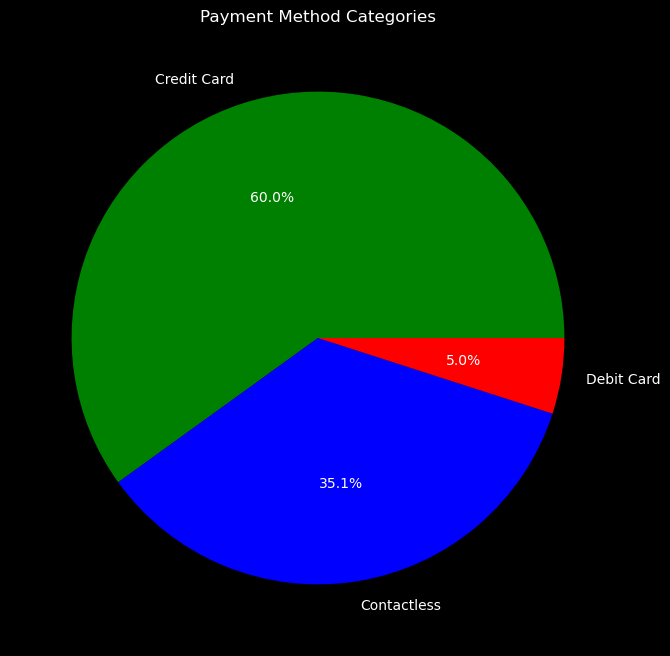

In [31]:
plt.figure(figsize= (12,8))
Payment_Method_Categories = df["Payment Method"].value_counts()
plt.pie(Payment_Method_Categories, labels= Payment_Method_Categories.index,autopct="%1.1f%%",colors={'red' ,'blue','green'})
plt.title("Payment Method Categories")
plt.show()

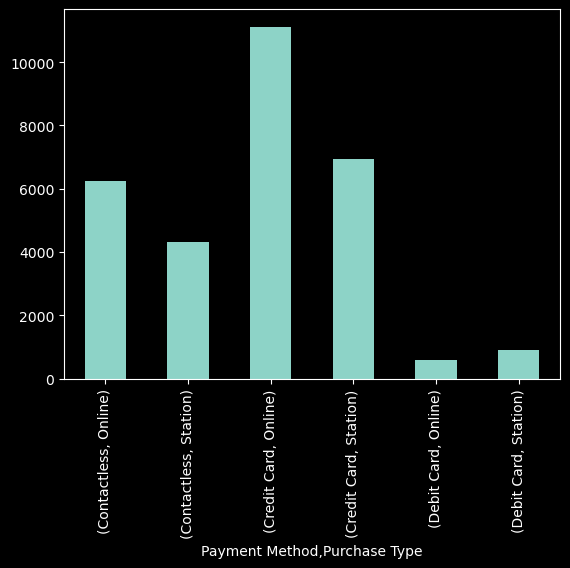

In [32]:
df.groupby(['Payment Method' , "Purchase Type"]).size().plot(kind="bar")
plt.show()

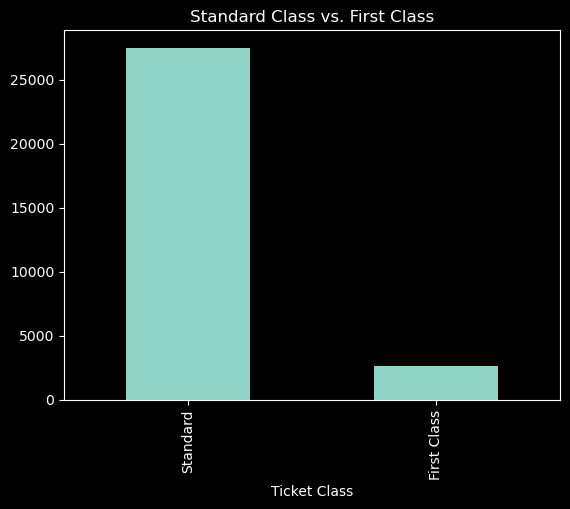

In [33]:
df["Ticket Class"].value_counts().plot(kind="bar")
plt.title("Standard Class vs. First Class")
plt.show()


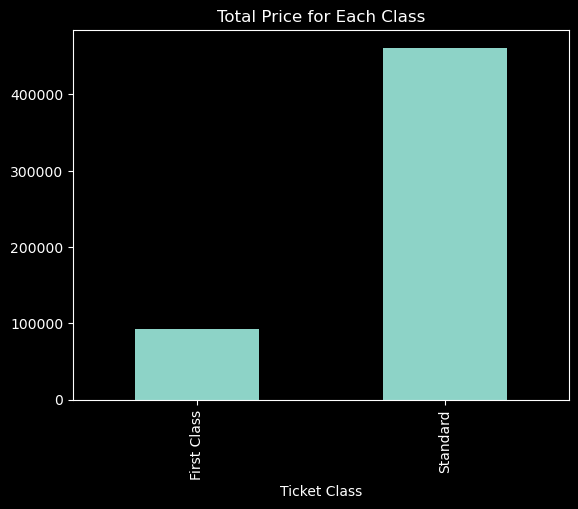

In [34]:
df.groupby("Ticket Class")["Price"].sum().plot(kind='bar')
plt.title("Total Price for Each Class")
plt.show()

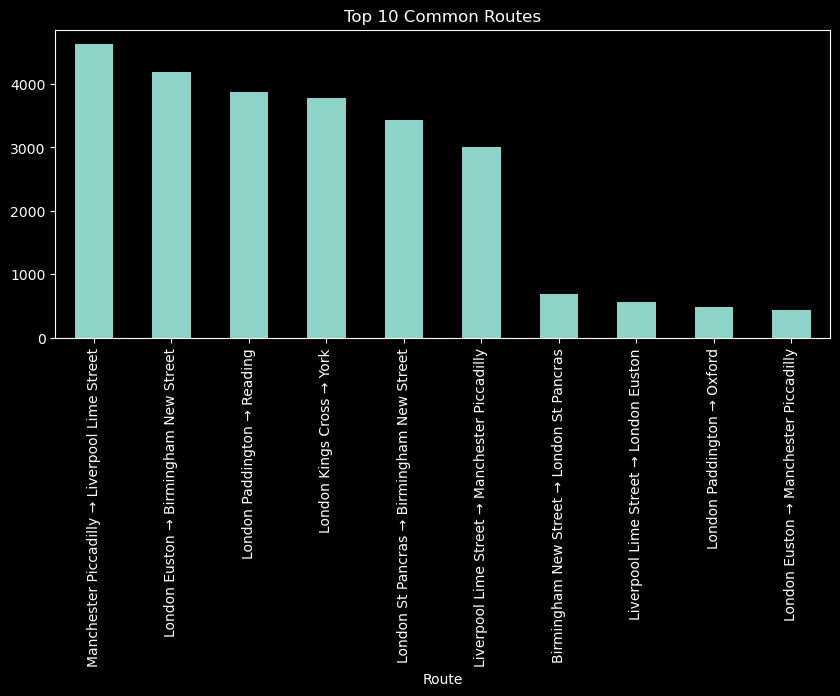

In [35]:
plt.figure(figsize=(10,4))
df["Route"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Common Routes")
plt.show()

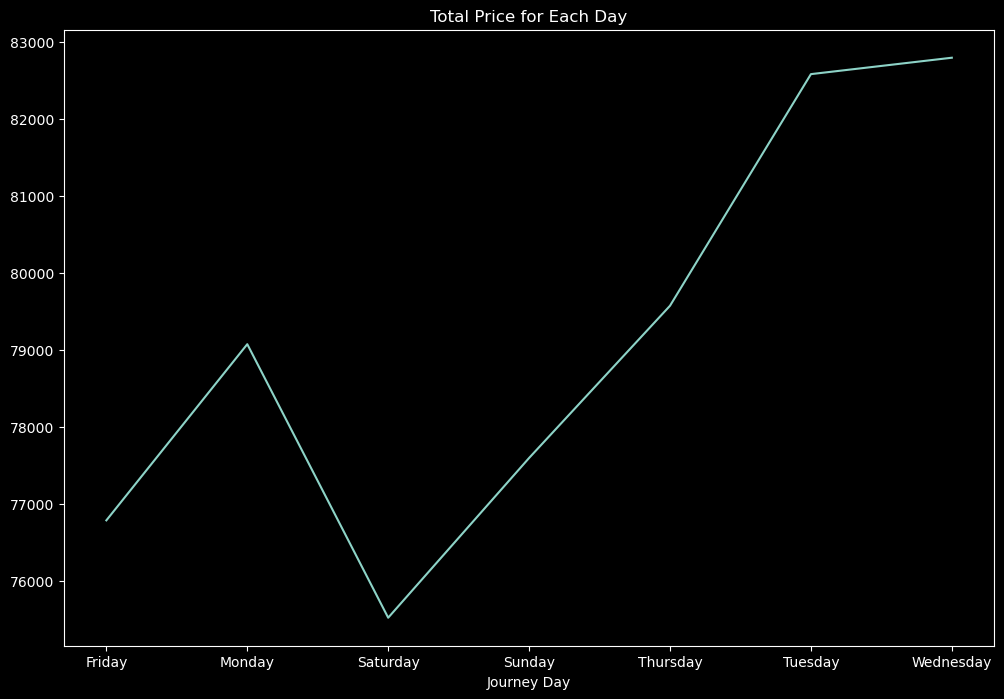

In [36]:
plt.figure(figsize=(12,8))
df.groupby("Journey Day")["Price"].sum().plot(kind="line")
plt.title("Total Price for Each Day")
plt.show()

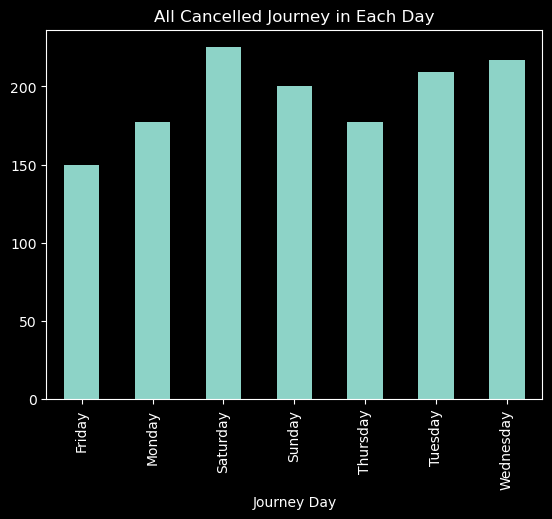

In [58]:
df.groupby("Journey Status").get_group("Cancelled").groupby("Journey Day").size().plot(kind='bar')
plt.title("All Cancelled Journey in Each Day")
plt.show()



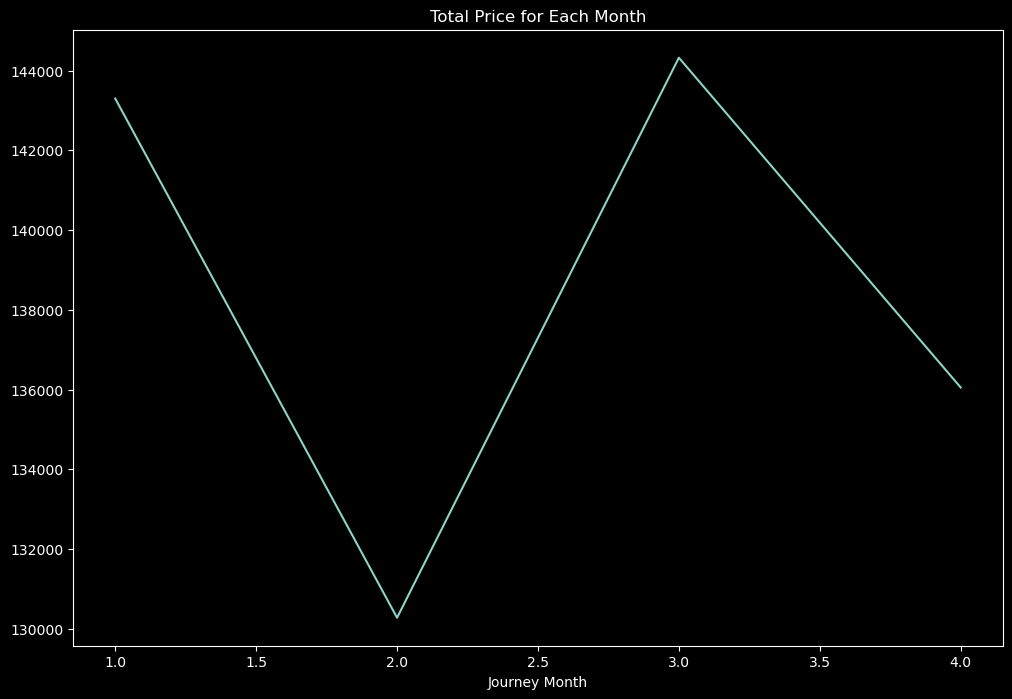

In [37]:
plt.figure(figsize=(12,8))
df.groupby("Journey Month")["Price"].sum().plot(kind="line")
plt.title("Total Price for Each Month")
plt.show()

In [38]:
df["Journey Status"].value_counts()

Journey Status
On Time      26606
Cancelled     1802
Delayed       1690
Name: count, dtype: int64

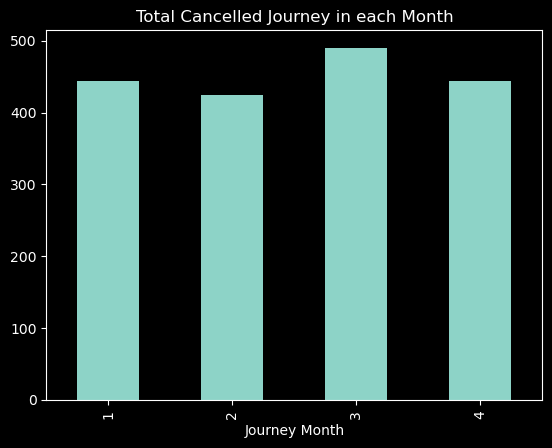

In [39]:
df.groupby("Journey Status").get_group("Cancelled").groupby("Journey Month").size().plot(kind='bar')
plt.title("Total Cancelled Journey in each Month")
plt.show()


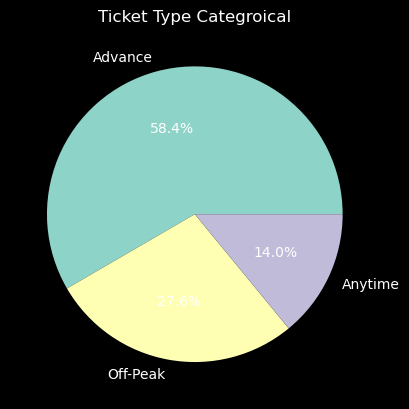

In [63]:
ticket_type_counts = df["Ticket Type"].value_counts()
plt.pie(ticket_type_counts , labels=ticket_type_counts.index , autopct='%1.1f%%')
plt.title("Ticket Type Categroical")
plt.show()

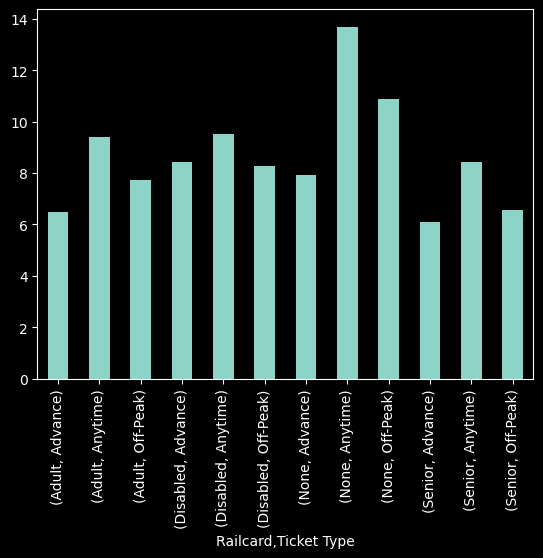

In [67]:
df.groupby(['Railcard',"Ticket Type" ])['Price'].mean().plot(kind='bar')
plt.show()

In [68]:
df.head()

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Journey Day,Journey Month,Route
1,2023-12-16,2025-08-20 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,2025-08-20 11:35:00,11:40:00,Delayed,Signal Failure,No,Monday,1,London Kings Cross → York
2,2023-12-19,2025-08-20 19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,2025-08-20 18:45:00,18:45:00,On Time,No Delay,No,Tuesday,1,Liverpool Lime Street → Manchester Piccadilly
3,2023-12-20,2025-08-20 23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,2025-08-20 22:30:00,22:30:00,On Time,No Delay,No,Monday,1,London Paddington → Reading
6,2023-12-31,2025-08-20 00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,2025-08-20 23:40:00,23:40:00,On Time,No Delay,No,Monday,1,London Euston → Oxford
7,2023-12-31,2025-08-20 01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,2025-08-20 00:30:00,00:30:00,On Time,No Delay,No,Monday,1,Liverpool Lime Street → Manchester Piccadilly
